# **Waze User Churn Project**

## Introduction

This portfolio project compiles analyses completed across different stages of the Google Advanced Data Analytics Professional Certificate on Coursera.

This project analyzes monthly user churn for Waze, a navigation app that helps drivers reach their destinations efficiently. Churn refers to users who uninstall or stop using the app.

The goal of this project is to analyze user churn patterns and determine which factors are most correlated with churn.  By identifying factors influencing churn, we can gain insights into user behavior and retention strategies. We use logistic regression to create a simple predictive model, assess its performance and discuss its limitations.

## Dataset Overview

For this analysis, we will be working with a dataset containing behavioral and usage data for Waze app users. The dataset includes the following columns:

- `ID`: numbered index
- `label`: indicates whether the user churned or was retained
- `sessions`: number of times a user opened the app during the month
- `drives`: number of drives taken using the app during the month
- `total_sessions`: total number of sessions since the user signed up
- `n_days_after_onboarding`: number of days since the user signed up for the app
- `total_navigations_fav1`: total navigations to the user's primary favorite location
- `total_navigations_fav2`: total navigations to the user's secondary favorite location
- `driven_km_drives`: total kilometers driven during the month
- `duration_minutes_drives`: total duration (in minutes) of drives during the month
- `activity_days`: number of days a user was active in the app during the month
- `driving_days`: number of days a user took a drive using the app during the month 
- `device`: user's device type (iPhone or Android)


This dataset is sourced from Google's Advanced Data Analytics course and is available as a csv in the same folder as this project.

## Data Exploration
We begin by loading the dataset and performing an initial overview of the data to understand the variables and their distributions.

### Imports and data loading

In [ ]:
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### Loading the Dataset

In [3]:
# Load dataset into dataframe
df = pd.read_csv('/Users/Joanna/Downloads/waze_dataset.csv')

In [4]:
# Inspect the first few lines of the data set
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [5]:
# Determine the number of data points in the dataset
df.size

194987

In [6]:
# Determine the number of rows and columns in the dataset
df.shape

(14999, 13)

In [7]:
# Get summary info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The data set contains integers, objects, and floats. It has 700 missing values in the `labels` column.

### Identifying Outliers

In [8]:
# Get descriptive statistics on the numerical columns
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The following columns appear to have outliers:

- sessions
- drives
- total_sessions
- total_navigations_fav1
- total_navigations_fav2
- driven_km_drives
- duration_minutes_drives

### Investigating Missing Data

We compare the summary statistics of the 700 rows with missing labels against the rows with no missing values to determine any significant differences

In [9]:
# Isolate rows with null values
df_null = df[df['label'].isnull()]

# Display summary stats of rows with null values
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [10]:
# Isolate rows without null values
df_non_null = df[~df['label'].isnull()]

# Display summary stats of rows without null values
df_non_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000



The means and standard deviations between the population with missing labels and population without missing labels do not differ significantly

### Investigating churn rates

Nex, we examine the balance of users who churned vs. those who were retained.

In [11]:
df['label'].value_counts(normalize = True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

This dataset contains 82.26% retained users and 17.74% churned users.

We examine whether there is an imbalance in how many users churned by device type.

In [ ]:
# Calculate the percentage of churned vs. retained users per device type
df.groupby('device')['label'].value_counts(normalize=True)

device   label   
Android  retained    0.824399
         churned     0.175601
iPhone   retained    0.821680
         churned     0.178320
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group.

To better understand the differences between churned and retained users, we calculate the median values of all variables for each group. We use the median rather than the mean to mitigate the impact of outliers.

In [ ]:
# Calculate median values of all columns for churned and retained users
df.groupby(['label']).median(numeric_only = True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


- The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user
- Retained users used the app on over twice as many days as churned users in the same time period

- It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration.

We calculate the median kilometers per drive for both retained and churned users.

In [ ]:
# Add a column to df called `km_per_drive`
df['km_per_drive'] = df['driven_km_drives'] / df['drives']

# Group by `label`, calculate the median, and isolate for km per drive
df.groupby(['label']).median(numeric_only = True)[['km_per_drive']]

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user.

In [ ]:
# Drop the column since it is only for analysis purposes
df = df.drop(columns=['km_per_drive'])

We calculate the median drives per driving day for both retained and churned users.

In [ ]:
# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for drives per driving day
df.groupby(['label']).median(numeric_only = True)[['drives_per_driving_day']]

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The median retained user had about 6 fewer drives per driving day median churned user.

In [ ]:
# Drop the column since it is only for analysis purposes
df = df.drop(columns=['drives_per_driving_day'])

We calculate the median kilometer per driving day for both retained and churned users.

In [ ]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for km per driving day
df.groupby(['label']).median(numeric_only = True)[['km_per_driving_day']]

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


The median retained user drove about 400 km less per driving day median churned user.

In [ ]:
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note: Some values are infinite due to the presence of zero values in the `driving_days` column, which results in a division by zero. We convert these infinite values to zero.

In [ ]:
# Convert infinite values to zero
df['km_per_driving_day'] = np.where(df['km_per_driving_day'] == np.inf, 0, df['km_per_driving_day'])

# Verify the changes
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

Given the high driving frequency of some users, we create a new binary feature called professional_driver to separate professional drivers from non-professionals.

`professional_driver` is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

In [ ]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [ ]:
# Check count of professionals and non-professionals
df['professional_driver'].value_counts()

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### Initial Data Exploration observations:

- The data contains 700 missing label values. There was no apparent pattern to the missing data.
- The data contains outliers in 7 columns
- 82% of users in the dataset were retained and 18% churned
- There was no observable difference in churn rates between iPhone and Andrioid users
- The investigation gave rise to the question of a specific subset of drivers that seemed to churn more than others: Users who churned drove further and longer distances in a single session.
- The data appears to represent users who are heavy drivers, and there may be a high proportion of long-haul drivers or professional drivers.


## Data Cleaning
We clean the dataset by addressing missing values, duplicates, and outliers. This ensures that the data is ready for analysis.

In [72]:
# Get descriptive statistics on the numerical columns of the dataset 
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,professional_driver
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,inf,0.172945
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,NaN,0.378212
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,1.800000e+00,0.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,4.666667e+00,0.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,1.216667e+01,0.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,inf,1.000000


Use `.drop()` to remove the ID column since we don't need this information for our analysis.

In [73]:
df = df.drop('ID', axis=1)

From previous EDA, there is no evidence of a non-random cause of the 700 missing values in the `label` column and these observations comprise less than 5% of the data, so we will use the `dropna()` method to drop the rows that are missing this data.

In [74]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

### Impute outliers

Previously, we determined that seven of the variables had clear signs of outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, we will impute the outlying values for these columns. We calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.

In [75]:
# Impute outliers

df_columns = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives'] 

for column in df_columns:
    percentile = df[column].quantile(0.95)
    df[column] = df[column].apply(lambda x: x if x <= percentile else percentile)

In [78]:
# Check that the outliers were imputed correctly
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


We change the data type of the `label` column to binary. This change is needed to train a logistic regression model.

We assign a `0` for all `retained` users

and assign a `1` for all `churned` users

We save this variable as `label2` as to not overwrite the original `label` variable.

In [79]:
# Create binary `label2` column
label_map = {'retained': 0, 'churned': 1}

df['label2'] = df['label'].map(label_map)

# Check both columns to ensure the conversion was performed correctly
df[['label','label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


## Checking logistic regression assumptions

The following are the assumptions for logistic regression:

* Independent observations 

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we can assume that observations are independent for this project due to the data collection method.

The second assumption has already been addressed during data cleaning.

The last assumption will be verified after modeling.

### Check for Multicollinearity

We need to check the correlation among predictor variables. First, we generate a correlation matrix.

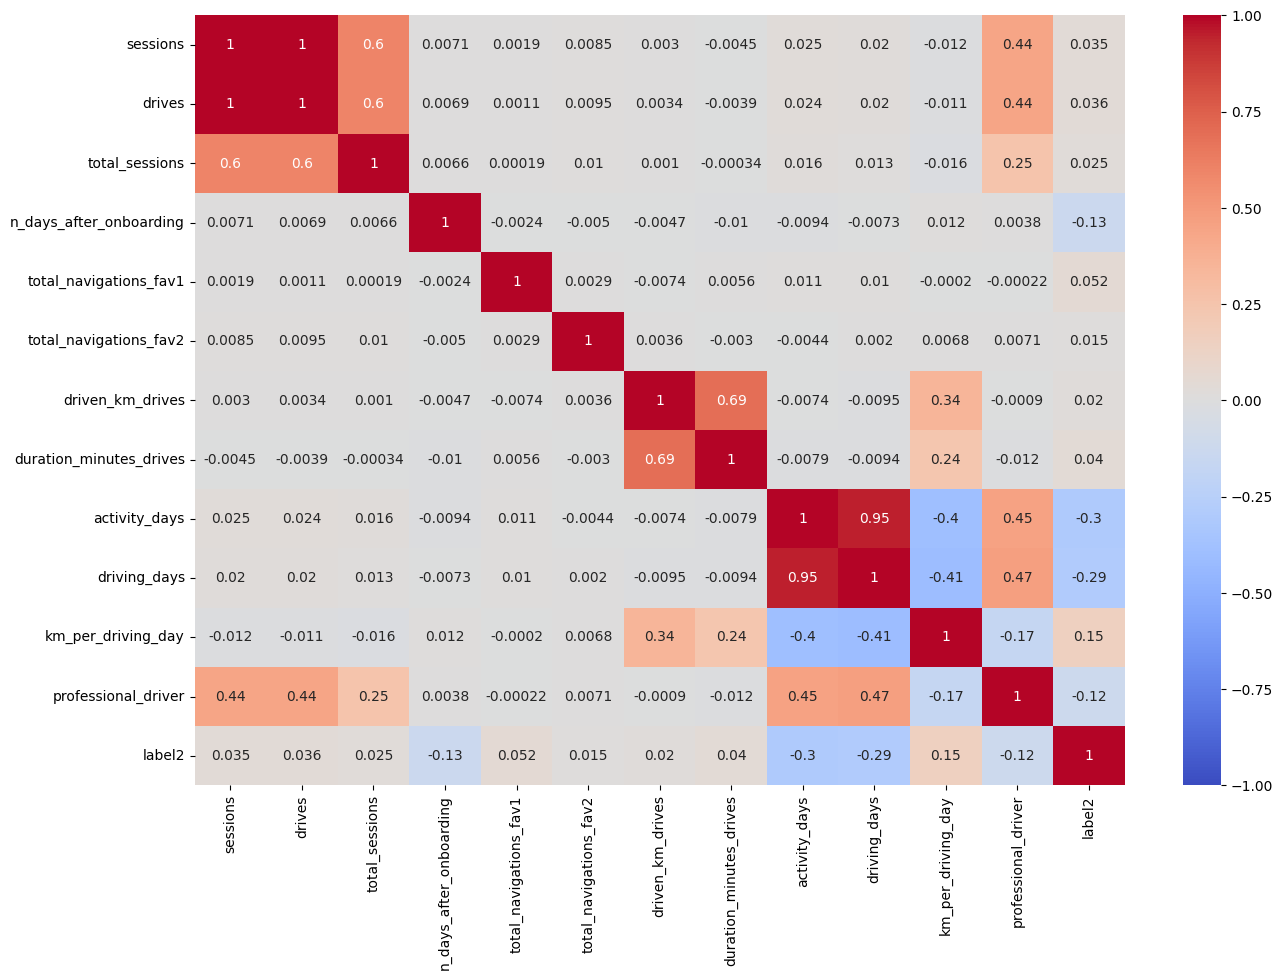

In [80]:
# Generate a correlation matrix
corr = df.select_dtypes(include='number').corr()

# Plot correlation heatmap
plt.figure(figsize=(15,10))

sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in our model.

From the correlation matrix, we can conclude these variables are multicollinear with each other:
- drives & sessions
- driving_days & activity_days

## Logistic regression

### Create dummy variables

We create dummy variables for `device` since this variable is categorical.

Because this dataset only has one remaining categorical feature (`device`) we will implement the transformation directly rather than use a special function.

We create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [81]:
# Create new `device2` variable
device_map = {'Android': 0, 'iPhone': 1}

df['device2'] = df['device'].map(device_map)

# Check both columns to ensure the conversion was performed correctly
df[['device','device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### Assign predictor and target variables

To build the model we need to determine what X variables to include to predict the target `label2`.

We Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

 `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days` because the features that were kept for modeling had slightly stronger correlations with the target variable.

In [82]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

# Isolate target variable
y = df['label2']

### Split the data 

We use scikit-learn's [`train_test_split()`] function to perform a train/test split on the data using the X and y variables assigned above.

It is important to do a train test to obtain accurate predictions. We want to fit the model on the training set and evaluate the model on the test set to avoid data leakage.

Because the target class is imbalanced (82% retained vs. 18% churned), we want to make sure that we don't get an unlucky split that over- or under-represents the frequency of the minority class. Therefore, we set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [84]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

We use scikit-learn to instantiate a logistic regression model and add the argument `penalty = None` since the predictors are unscaled.

We fit the model on `X_train` and `y_train`.

In [86]:
clf = LogisticRegression(penalty=None, max_iter=400).fit(X_train,y_train)

We call the `.coef_` attribute on the model to get the coefficients of each variable. The coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

In [87]:
pd.Series(clf.coef_[0], index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

We call the model's `intercept_` attribute to get the intercept of the model.

In [88]:
clf.intercept_

array([-0.00170675])

### Check final assumption

We Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. We assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [89]:
# Get the predicted probabilities of the training data
training_probabilities = clf.predict_proba(X_train)

We Create a dataframe called `logit_data` that is a copy of `df`.

We Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.

In [90]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

We verify the linear relationship between X and the estimated log odds by making a regplot.

The x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `activity_days`.

<Axes: xlabel='activity_days', ylabel='logit'>

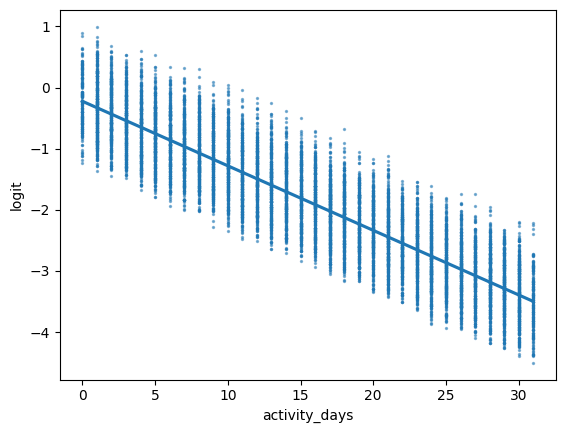

In [91]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})

## Results and evaluation

In [92]:
# Generate predictions on X_test
y_pred = clf.predict(X_test)

We use the `confusion_matrix` function to obtain a confusion matrix.

In [94]:
cm = confusion_matrix(y_test, y_pred)

Next, we use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell.

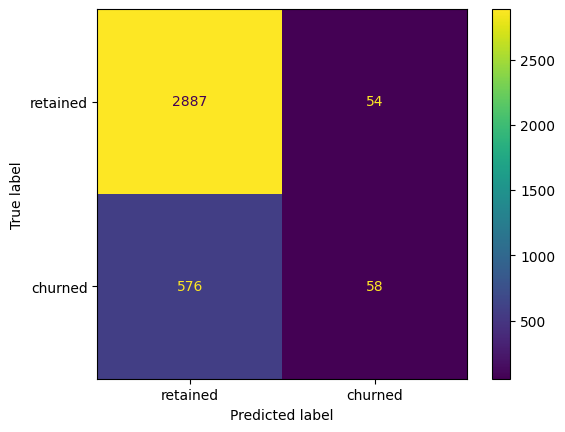

In [95]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [96]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

We generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

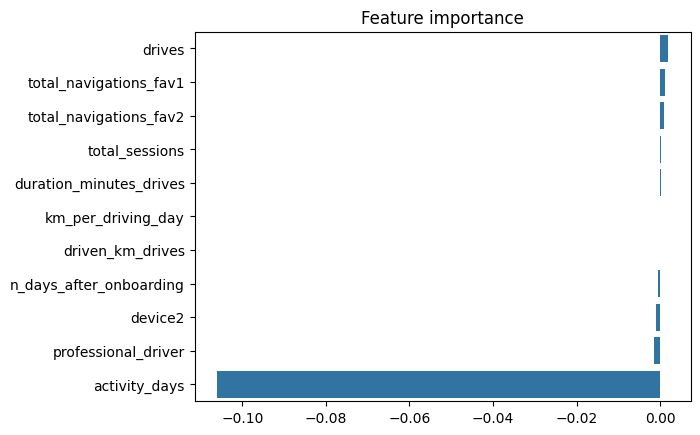

In [97]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

## Conclusion

- activity_days was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with driving_days, which was known from EDA to have a negative correlation with churn.

- In previous EDA, user churn rate increased as the values in km_per_driving_day increased. The correlation heatmap in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable. In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.

- The model is not a strong enough predictor to drive consequential business decisions, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.

- To improve the model new features could be engineered to try to generate better predictive signal. In the case of this model, one of the engineered features (professional_driver) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.

- It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.